# Pair Programming Normalización

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import kstest
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizadla. Podéis usar el método que prefiráis o el que mejor se ajuste
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [3]:
df = pd.read_csv('datos/wellness_1.csv', index_col = 0)
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


In [4]:
df.dtypes


FRUITS_VEGGIES               int64
DAILY_STRESS                object
CORE_CIRCLE                  int64
SOCIAL_NETWORK               int64
BMI_RANGE                    int64
DAILY_STEPS                  int64
SLEEP_HOURS                  int64
SUFFICIENT_INCOME            int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [5]:
# cambiamos el tipo de datos a 3 columnas:
for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']:
    df[col] = df[col].astype('category')

In [6]:
df5 = df.copy()

Una de las asunciones que se deben cumplir para realizar una predicción de tipo regresión lineal es que los datos se ajusten a una distribución normal.

En primer lugar ya vimos que la distribución de los datos de nuestra variable respuesta es de campana de Gauss, como podemos ver en el siguiente displot:

<AxesSubplot:xlabel='WORK_LIFE_BALANCE_SCORE', ylabel='Density'>

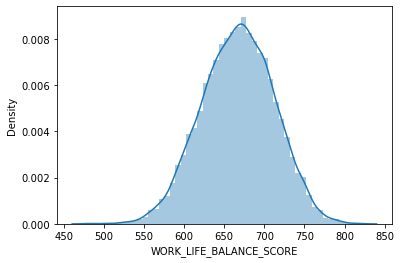

In [7]:
sns.distplot(df5["WORK_LIFE_BALANCE_SCORE"])

O en el histplot:

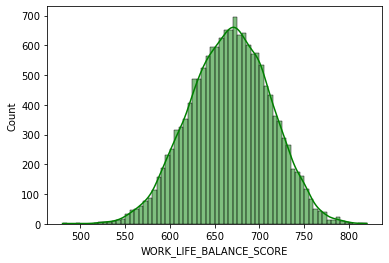

In [8]:
sns.histplot(df5["WORK_LIFE_BALANCE_SCORE"], kde = True, color = "green");

Visualmente podríamos decir que tenemos una distribución normal, pero por los p-valor y los test que hemos realizado anteriormente sabemos que no es así.

Podríamos intentar realizarla manualmente:

In [9]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = df5['WORK_LIFE_BALANCE_SCORE'].mean()
maximo = df5['WORK_LIFE_BALANCE_SCORE'].max() 
minimo = df5['WORK_LIFE_BALANCE_SCORE'].min()

In [10]:
# y creamos una columna nueva con el resultado de la normalización

df5['WORK_LIFE_BALANCE_SCORE_normalizado'] = (df5['WORK_LIFE_BALANCE_SCORE'] - media) / (maximo - minimo )

In [11]:
df5.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_normalizado
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,-0.168575
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,-0.033067


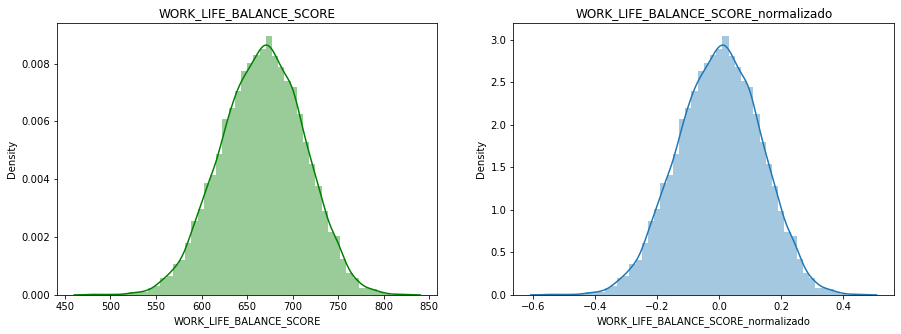

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('WORK_LIFE_BALANCE_SCORE')
axes[1].set_title('WORK_LIFE_BALANCE_SCORE_normalizado')

sns.distplot(df5['WORK_LIFE_BALANCE_SCORE'] ,ax = axes[0], color = 'green')
sns.distplot(df5['WORK_LIFE_BALANCE_SCORE_normalizado'], ax = axes[1]);

In [13]:
kstest(df5['WORK_LIFE_BALANCE_SCORE_normalizado'], 'norm') # pvalor < 0.05 no normal

KstestResult(statistic=0.3789677316849219, pvalue=0.0)

____________________________________________________________________

 - Transformaciones con raíces cuadradas:
    -  Consiste en aplicar una raiz cuadrada a nuestros datos con el fin de hacer que la distribución de los datos sea más compacta. OBS.: si se aplica sobre una serie de datos sesgados  a la izquierda, haremos que los datos sean aún más sesgados.

In [14]:
df5['WORK_LIFE_BALANCE_SCORE_RAIZ'] = df5['WORK_LIFE_BALANCE_SCORE'].apply(lambda x: math.sqrt(x))

In [15]:
df5.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_normalizado,WORK_LIFE_BALANCE_SCORE_RAIZ
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,-0.168575,24.688054
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,-0.033067,25.604687


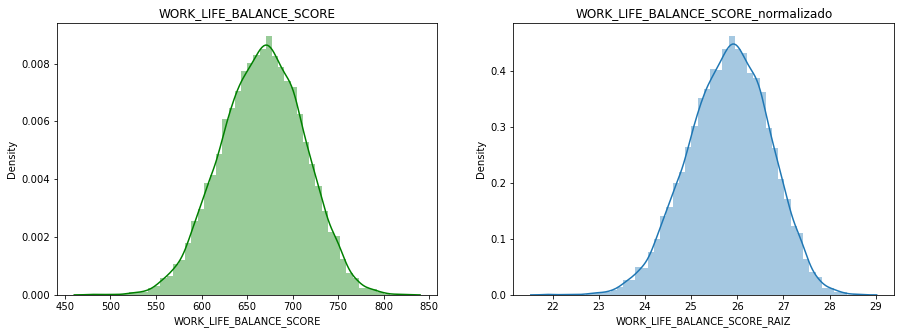

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('WORK_LIFE_BALANCE_SCORE')
axes[1].set_title('WORK_LIFE_BALANCE_SCORE_normalizado')

sns.distplot(df5['WORK_LIFE_BALANCE_SCORE'] ,ax = axes[0], color = 'green')
sns.distplot(df5['WORK_LIFE_BALANCE_SCORE_RAIZ'], ax = axes[1]);

In [17]:
kstest(df5['WORK_LIFE_BALANCE_SCORE_RAIZ'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

______________________________________________________________________________________

Transformaciones Logarítmicas: implican la conversión de una columna a la escala lograrítimica. 

 - Esta transformación no la podremos hacer si tenemos algún valor en nuestra variable que sea 0: aplicamos una *list comprehension* para evitar tener errores con los posibles valores 0 en nuestra columna. 

In [18]:
df5['WORK_LIFE_BALANCE_SCORE_LOG'] = df5['WORK_LIFE_BALANCE_SCORE'].apply(lambda x: np.log(x) if x > 0 else 0)

In [19]:
df5.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_normalizado,WORK_LIFE_BALANCE_SCORE_RAIZ,WORK_LIFE_BALANCE_SCORE_LOG
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,-0.168575,24.688054,6.412639
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,-0.033067,25.604687,6.485551


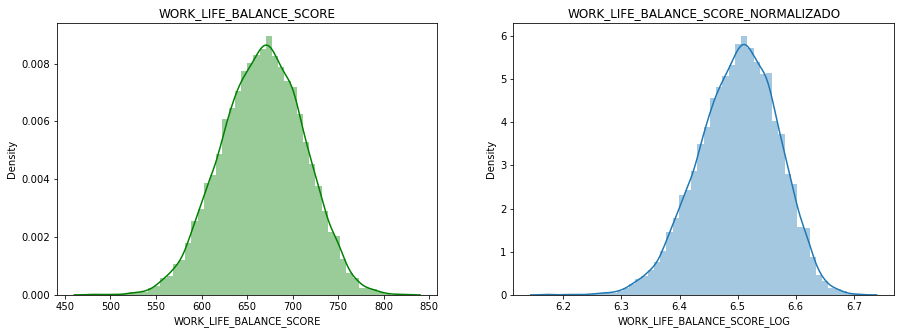

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('WORK_LIFE_BALANCE_SCORE')
axes[1].set_title('WORK_LIFE_BALANCE_SCORE_NORMALIZADO')

sns.distplot(df5['WORK_LIFE_BALANCE_SCORE'] ,ax = axes[0], color = 'green')
sns.distplot(df5['WORK_LIFE_BALANCE_SCORE_LOG'], ax = axes[1]);

In [21]:
kstest(df5['WORK_LIFE_BALANCE_SCORE_LOG'], 'norm')

KstestResult(statistic=0.9999999996666313, pvalue=0.0)

---> vemos por los graficos que ha cambiado un poco pero seguimos con valores no normales, haciendo la prueba de Kolmogorov lo comprobamos con pvalor < 0.05. Seguiremos probando.

___________________________________________________________________________

* Transformación boxcox():
    Vamos a calcular el valor de lambda que varía de - 5 a 5. Se dice que un valor de lambda es el mejor si es capaz de aproximar la curva no normal a una curva normal. 
    Lo que hará este método será, aplicar una logarítmica para los valores positivos y exponencial para valores negativos de nuestra columna (porque recordemos que no podemos hacer el logaritmo de un número negativo) 


In [22]:
# si lo aplicaramos solo a una columna lo haríamos de la siguiente forma: 

df5['WORK_LIFE_BALANCE_SCORE_BOX'], lambda_ajustada = stats.boxcox(df5['WORK_LIFE_BALANCE_SCORE'])


In [23]:
lambda_ajustada   
# operación que realiza: y=cada valor de variable : (y elevado al valor lambda menos 1)/valor lambda : 
# en seguida realiza un test shapiro por todas las variables y nos devulve el 'mejor' valor para normalizar los datos.

1.5149446504556376

In [24]:
df5.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_normalizado,WORK_LIFE_BALANCE_SCORE_RAIZ,WORK_LIFE_BALANCE_SCORE_LOG,WORK_LIFE_BALANCE_SCORE_BOX
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,-0.168575,24.688054,6.412639,10930.953142
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,-0.033067,25.604687,6.485551,12207.643933


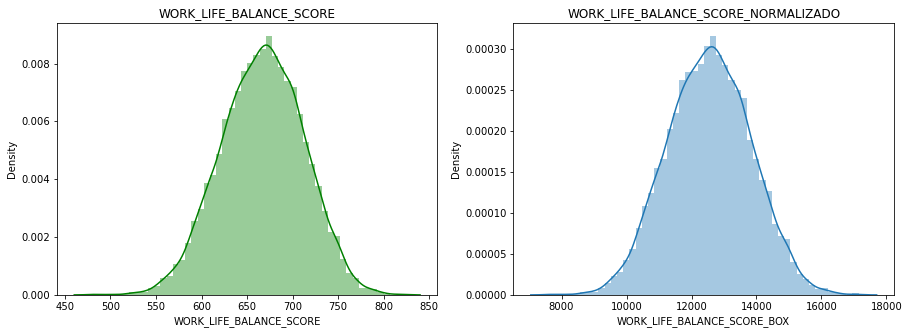

In [25]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('WORK_LIFE_BALANCE_SCORE')
axes[1].set_title('WORK_LIFE_BALANCE_SCORE_NORMALIZADO')

sns.distplot(df5['WORK_LIFE_BALANCE_SCORE'],ax = axes[0], color = 'green')
sns.distplot(df5['WORK_LIFE_BALANCE_SCORE_BOX'], ax = axes[1]);

In [26]:
kstest(df5['WORK_LIFE_BALANCE_SCORE_BOX'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

______________________________________________________________________________

- La transformación Sklearn MinMaxScaller:  MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
    - transforma las variables escalando cada una de ellas a un rango determinado, por defecto lo hará entre 0-1 Este estimador escala y traduce cada variable individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.


In [27]:
numericas = df5.select_dtypes(include = np.number)

In [28]:
minmax = MinMaxScaler()

In [29]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df5[['WORK_LIFE_BALANCE_SCORE']])

MinMaxScaler()

In [30]:
# transformamos los datos
X_normalizadas = minmax.transform(df5[['WORK_LIFE_BALANCE_SCORE']])

In [31]:
X_normalizadas.min(axis=0)

array([0.])

In [32]:
X_normalizadas.max(axis=0)

array([1.])

In [33]:
# tenemos nuestras variables numéricas entre 0 y 1. Ahora convertimos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ['WORK_LIFE_BALANCE_SCORE_Sklearn'])
numericas_minmax.head(2)

,WORK_LIFE_BALANCE_SCORE_Sklearn
0,0.380658
1,0.516167


In [34]:
# incorporamos la columna al dataframe 

df5['WORK_LIFE_BALANCE_SCORE_Sklearn'] = numericas_minmax
df5.head(3)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_normalizado,WORK_LIFE_BALANCE_SCORE_RAIZ,WORK_LIFE_BALANCE_SCORE_LOG,WORK_LIFE_BALANCE_SCORE_BOX,WORK_LIFE_BALANCE_SCORE_Sklearn
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,-0.168575,24.688054,6.412639,10930.953142,0.380658
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,-0.033067,25.604687,6.485551,12207.643933,0.516167
2,2,3,4,10,2,4,8,2,8,3,36 to 50,Female,631.6,-0.103614,25.131653,6.448256,11537.008093,0.445620


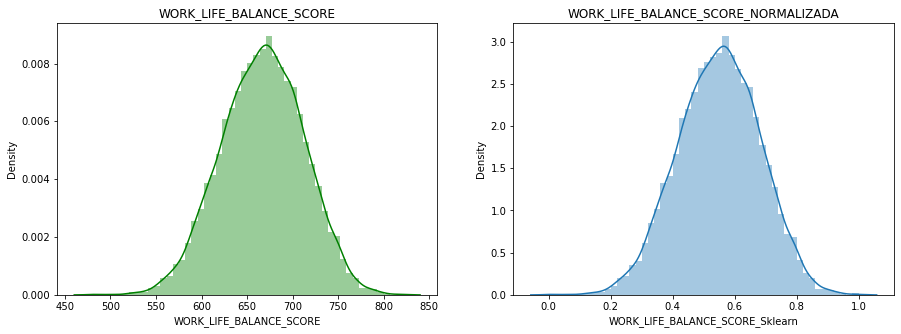

In [35]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('WORK_LIFE_BALANCE_SCORE')
axes[1].set_title('WORK_LIFE_BALANCE_SCORE_NORMALIZADA')

sns.distplot(df5['WORK_LIFE_BALANCE_SCORE'] ,ax = axes[0], color ='green')
sns.distplot(df5['WORK_LIFE_BALANCE_SCORE_Sklearn'], ax = axes[1]);

In [36]:
kstest(df5['WORK_LIFE_BALANCE_SCORE_Sklearn'], 'norm')

KstestResult(statistic=nan, pvalue=nan)

---> Los resultados han sido todos iguales => pvalor < 0.05 => no hemos logrado normalizar los datos.

---> Podemos concluir que los resultados obtenidos de los intentos de normalización de datos no han sido satisfatórios => para todos pvalor < 0,05 => no normales. 
No hemos podido ver un resultado más aproximado del objectivo de normalizar los datos. 


Conservaremos la columna correspondiente al procedimiento que creemos que ha podido ser un poco más efectivo. En casos como el nuestro en que visualmente se puede observar una distribución de campana de Gauss lo que más puede acercar los datos a una distribución normal suele ser la transformación con raíces cuadradas.

In [37]:
#  Borramos el resto de columnas creadas con la realización de los tests.
df5.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE', 'WORK_LIFE_BALANCE_SCORE_normalizado',
       'WORK_LIFE_BALANCE_SCORE_RAIZ', 'WORK_LIFE_BALANCE_SCORE_LOG',
       'WORK_LIFE_BALANCE_SCORE_BOX', 'WORK_LIFE_BALANCE_SCORE_Sklearn'],
      dtype='object')

In [38]:
df5.drop(['WORK_LIFE_BALANCE_SCORE_LOG',
       'WORK_LIFE_BALANCE_SCORE_BOX', 'WORK_LIFE_BALANCE_SCORE_Sklearn','WORK_LIFE_BALANCE_SCORE_normalizado'], axis = 1, inplace = True)

In [39]:
df5.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_RAIZ
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,24.688054
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,25.604687


In [44]:
df5.to_csv('datos/wellness_5.csv')